In [3]:
# Feb 10, 2021
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

In [4]:
# En esta celda se hacen todas las operaciones de preparar el DataFrame df_meteo
# 
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Analizaremos los datos de Información Estadística Climatológica del Servico Meteorológico Nacional 
# de CONAGUA que podemos descargar del sitio:
# (https://smn.conagua.gob.mx/es/climatologia/informacion-climatologica/informacion-estadistica-climatologica) 

# Tomar la dirección URL del archivo en formato 'raw'
# url = 'https://raw.githubusercontent.com/MarioGHdz/FisicaComputacional1/master/Actividad%201/Datos%20diarios.txt'
url = 'https://raw.githubusercontent.com/MarioGHdz/FisicaComputacional1/master/Actividad%201/Datos%20diarios.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16499 entries, 0 to 16498
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   16499 non-null  datetime64[ns]
 1   Precip  16498 non-null  float64       
 2   Evap    11586 non-null  float64       
 3   Tmax    16465 non-null  float64       
 4   Tmin    16467 non-null  float64       
 5   Año     16499 non-null  int64         
 6   Mes     16499 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 902.4+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1969-05-01     0.0   9.0  30.5   8.5  1969  May
1 1969-05-02     0.0   9.1  30.5   8.5  1969  May
2 1969-05-03     0.0   9.0  30.0   9.0  1969  May
3 1969-05-04     0.0   7.1  27.5  12.0  1969  May
4 1969-05-05     5.0   4.3  28.0   7.5  1969  May
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
16494 2016-04-26     0.0   NaN  29.0   8.0  2016  Apr
16495

Creamos una **Serie de Tiempo**, fijando a la variable '*Fecha*' como nuevo índice del DataFrame

In [6]:
# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_ts = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

# Verificamos
df_meteo_ts.info()
print(df_meteo_ts.head())
#print(df_meteo_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16499 entries, 1969-05-01 to 2016-04-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  16498 non-null  float64
 1   Evap    11586 non-null  float64
 2   Tmax    16465 non-null  float64
 3   Tmin    16467 non-null  float64
 4   Año     16499 non-null  int64  
 5   Mes     16499 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 902.3+ KB
            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1969-05-01     0.0   9.0  30.5   8.5  1969  May
1969-05-02     0.0   9.1  30.5   8.5  1969  May
1969-05-03     0.0   9.0  30.0   9.0  1969  May
1969-05-04     0.0   7.1  27.5  12.0  1969  May
1969-05-05     5.0   4.3  28.0   7.5  1969  May


In [7]:
# Seleccionaremos un conjunto de años de 30 años  
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2018)]

In [8]:
df_90.head()

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1990-01-01,0.0,2.4,19.5,-0.5,1990,Jan
1990-01-02,4.3,1.4,16.5,0.0,1990,Jan
1990-01-03,0.0,1.5,11.0,0.5,1990,Jan
1990-01-04,0.0,2.3,16.0,-1.5,1990,Jan
1990-01-05,7.2,2.3,15.5,-1.5,1990,Jan


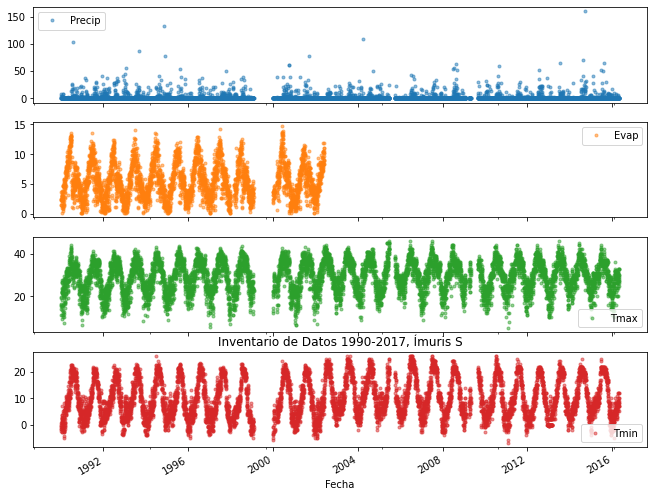

In [ ]:
# Podemos visualizar la colección de los últimos 30 años y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax (ºC)', 'Tmin (ºC)']
axes = df_90[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1990-2017, Ímuris S');

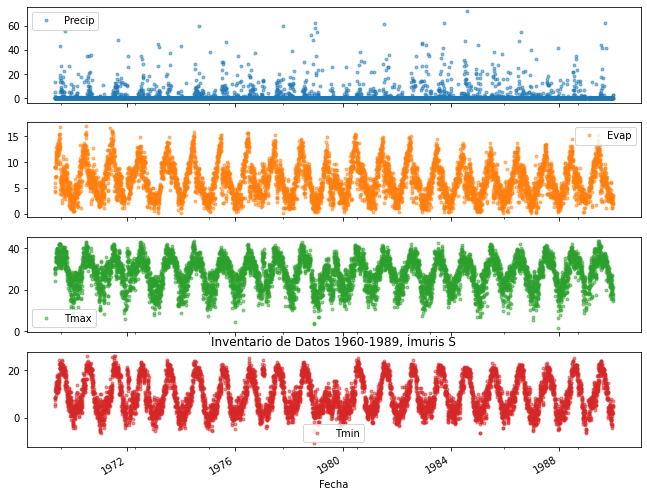

In [ ]:
# Podemos visualizar la colección de 30 años (1960-1989) y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax (ºC)', 'Tmin (ºC)']
axes = df_60[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1960-1989, Ímuris S');

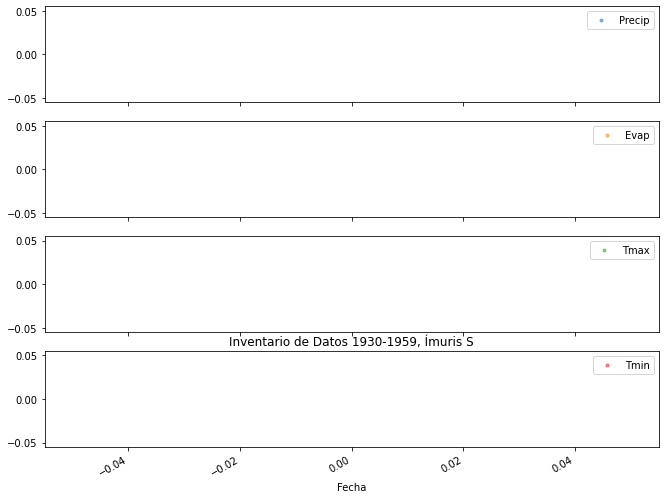

In [ ]:
# Podemos visualizar la colección de 30 años (1930-1959) y ver si hay datos faltantes.
cols_plot = ['Precip', 'Evap', 'Tmax', 'Tmin']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax (ºC)', 'Tmin (ºC)']
axes = df_30[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Inventario de Datos 1930-1959, Ímuris S');

Como se puede observar no hay datos disponibles, esto se debe a que la estación no operó durante estos años.

Variación en Precipitación promedio 60-30 : nan
Variación en Precipitación promedio 90-60 : 0.012878836930759974


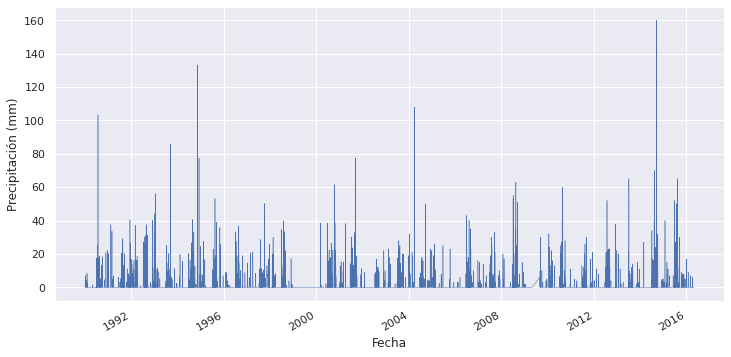

In [ ]:
# Graficamos la Precipitación de los últimos 30 años (1990-hasta 2017)
# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Calculamos algunos promedios de cada época de 30 años
Precip_ave_90 = df_90.Precip.mean()
Precip_ave_60 = df_60.Precip.mean()
Precip_ave_30 = df_30.Precip.mean()

# Graficamos la precipitación de la epoca 90 a la actualidad
df_90['Precip'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

# Calculamos diferencias de los promedios de precipitación
print('Variación en Precipitación promedio 60-30 :', Precip_ave_60-Precip_ave_30)
print('Variación en Precipitación promedio 90-60 :', Precip_ave_90-Precip_ave_60)

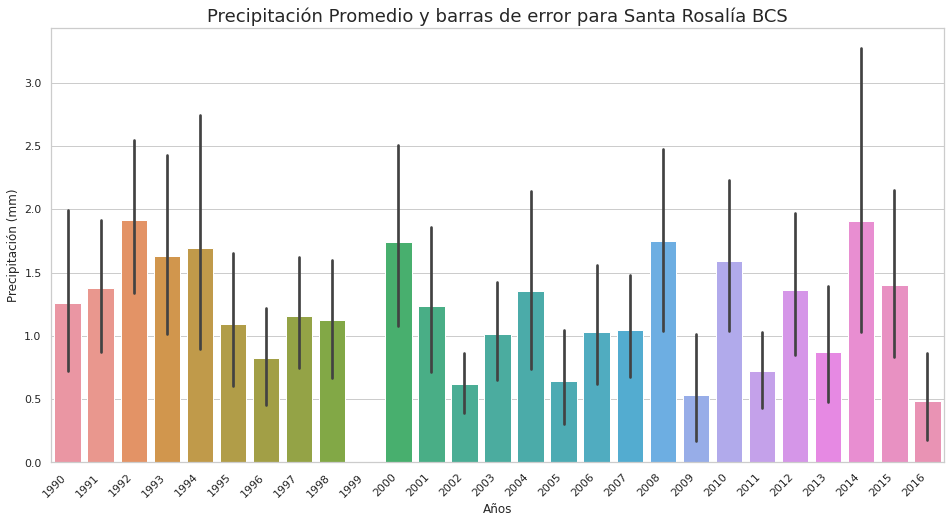

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Año
sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 30 años de datos usando la columna 'Año' en el eje x
g =sns.barplot(x='Año', y='Precip', data=df_90);

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Ímuris S', fontsize=18)

plt.show()

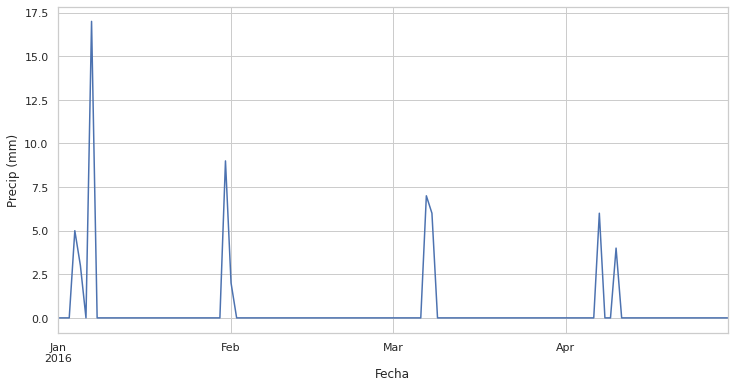

In [ ]:
# Investigando un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_90.loc['2016', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');

Datos del 2016 en adelante no están disponibles.

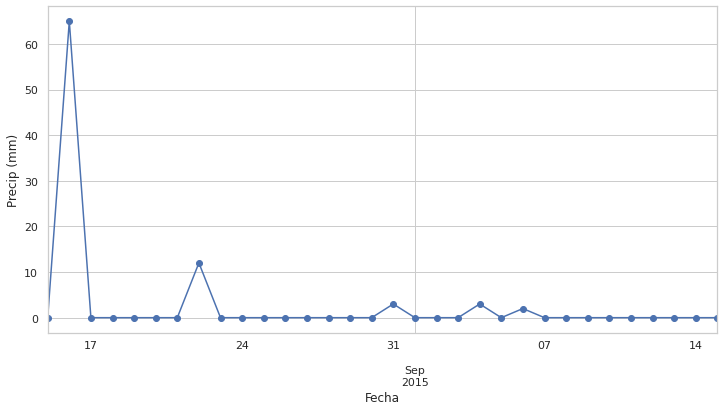

In [ ]:
# Investigando un periodo de datos con df.loc()
ax = df_90.loc['2015-08-15':'2015-09-15', 'Precip'].plot(marker='o', linestyle='-')
ax.set_ylabel('Precip (mm)');

Como se puede observar se uso el año 2015, ya que los datos relacionados al 2016 no están disponibles en adelante.

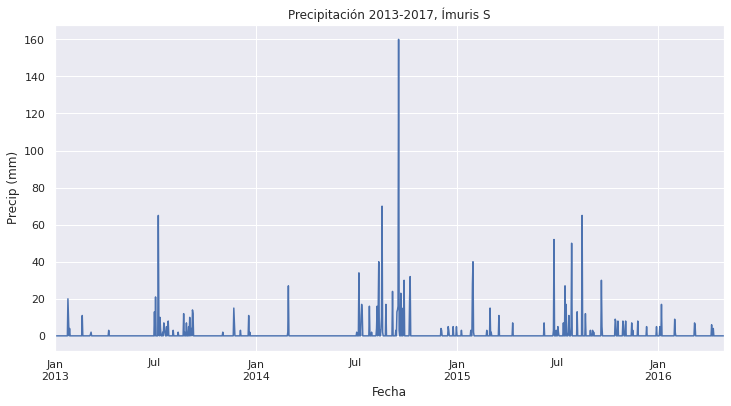

In [ ]:
# Investigando un rango de datos
sns.set(rc={'figure.figsize':(12, 6)})

ax = df_90.loc['2013':'2017', 'Precip'].plot()
ax.set_ylabel('Precip (mm)');
ax.set_title('Precipitación 2013-2017, Ímuris S');

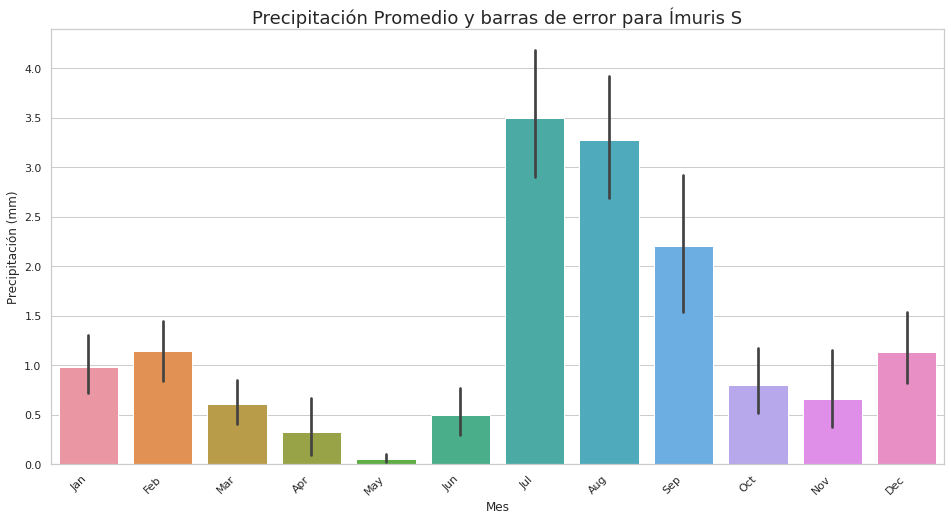

In [ ]:
# Gráfica de Precipitación últimos 30 años
# Agrupada por Mes
sns.set_style('whitegrid')

# Tamaño de la gráfica
plt.figure(figsize=(16,8))

# Graficamos 30 años de datos usando la columna 'Mes' en el eje x
g =sns.barplot(x='Mes', y='Precip', data=df_90);

# Rotamos 45º los Meses en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Ímuris S', fontsize=18)

plt.show()

Variación ºC Tmax promedio 90s-60s : 1.252198257454534


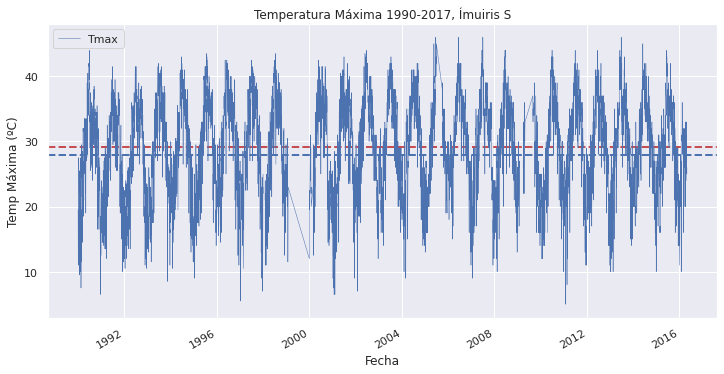

In [ ]:
# Graficamos la Tmax de los últimos 30 años (1990-hasta 2017)

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})

# Cálculo de promedios
Tmax_ave_90 = df_90.Tmax.mean()
Tmax_ave_60 = df_60.Tmax.mean()

# Graficar líneas promedios (rojo 1990-2017, azul 1960-1989)
plt.axhline(Tmax_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmax_ave_60, color = 'b', linestyle='--', linewidth=2);

# Graficar la Temperatura
df_90['Tmax'].plot(linewidth=0.5);
plt.ylabel('Temp Máxima (ºC)');
plt.title('Temperatura Máxima 1990-2017, Ímuiris S')

plt.legend();

# Imprime la diferencia de Temperaturas promedio entre épocas 
print('Variación ºC Tmax promedio 90s-60s :', Tmax_ave_90-Tmax_ave_60)

Variación ºC Tmin promedio 90s-60s : 0.6492882510225275


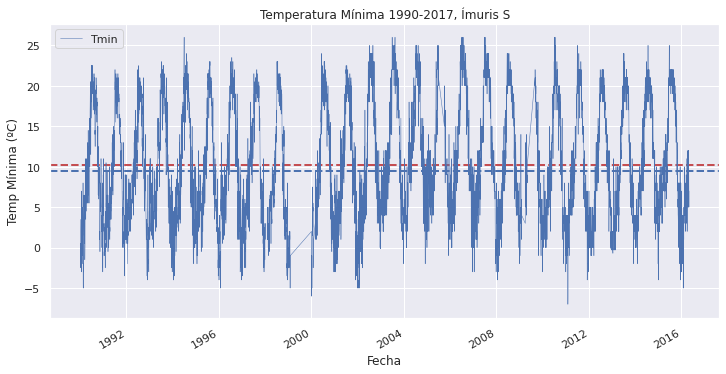

In [ ]:
# Hacemos lo mismo que la gráfica anterior con la Tmin
# Graficamos la Tmin de los últimos 30 años (1990-hasta 2017)
sns.set(rc={'figure.figsize':(12, 6)})

Tmin_ave_90 = df_90.Tmin.mean()
Tmin_ave_60 = df_60.Tmin.mean()

plt.axhline(Tmin_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave_60, color = 'b', linestyle='--', linewidth=2);

df_90['Tmin'].plot(linewidth=0.5);
plt.ylabel('Temp Mínima (ºC)');
plt.title('Temperatura Mínima 1990-2017, Ímuris S')

plt.legend();



print('Variación ºC Tmin promedio 90s-60s :', Tmin_ave_90-Tmin_ave_60)

Variación mm Evaporación promedio 90s-60s : -0.8862354250591089


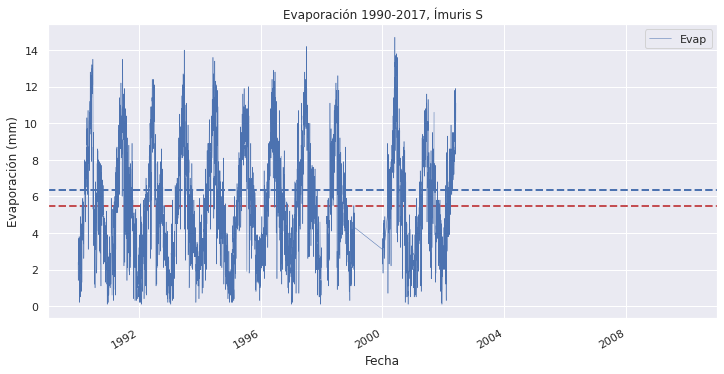

In [10]:

# Graficamos la Evap de los últimos 30 años (1990-hasta 2017)
sns.set(rc={'figure.figsize':(12, 6)})

Evap_ave_90 = df_90.Evap.mean()
Evap_ave_60 = df_60.Evap.mean()

plt.axhline(Evap_ave_90, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Evap_ave_60, color = 'b', linestyle='--', linewidth=2);

df_90['Evap'].plot(linewidth=0.5);
plt.ylabel('Evaporación (mm)');
plt.title('Evaporación 1990-2017, Ímuris S')

plt.legend();



print('Variación mm Evaporación promedio 90s-60s :', Evap_ave_90-Evap_ave_60)

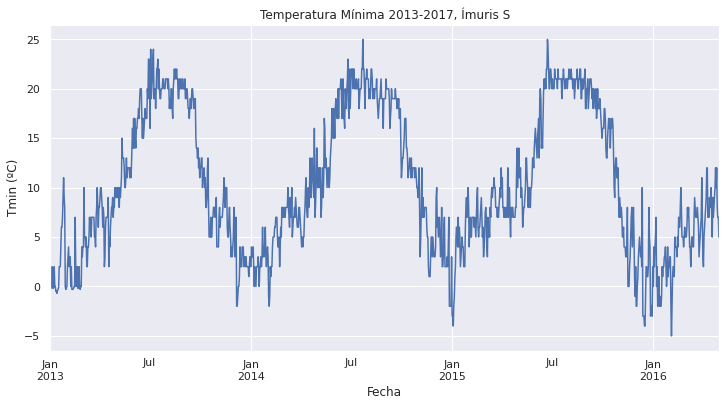

In [11]:
# Investigando un rango de datos para la Temperatura Mínima
sns.set(rc={'figure.figsize':(12, 6)})

ax = df_90.loc['2013':'2017', 'Tmin'].plot()
ax.set_ylabel('Tmin (ºC)');
ax.set_title('Temperatura Mínima 2013-2017, Ímuris S');

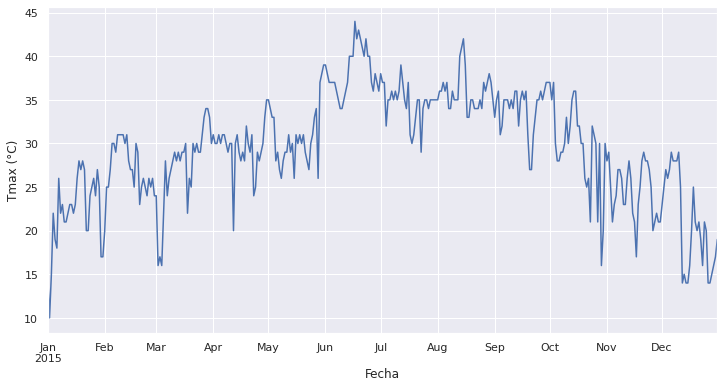

In [13]:
# Investigando un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_90.loc['2015', 'Tmax'].plot()
ax.set_ylabel('Tmax (°C)');

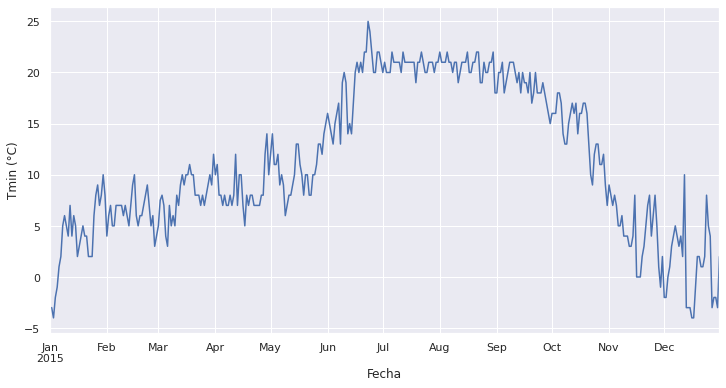

In [14]:
# Investigando un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_90.loc['2015', 'Tmin'].plot()
ax.set_ylabel('Tmin (°C)');

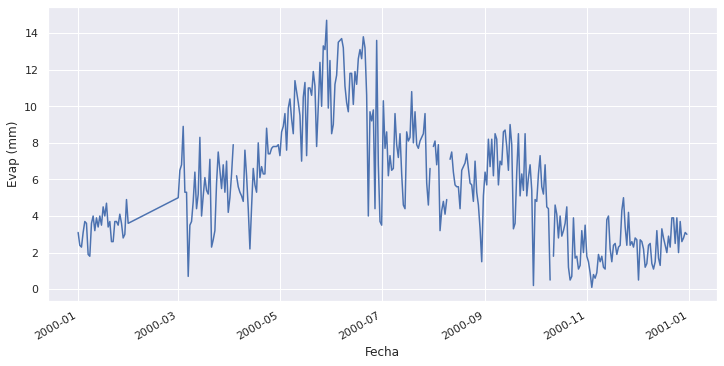

In [18]:
# Investigando un año de datos, usando la función df.loc() para filtrar un periodo
ax = df_90.loc['2000', 'Evap'].plot()
ax.set_ylabel('Evap (mm)');

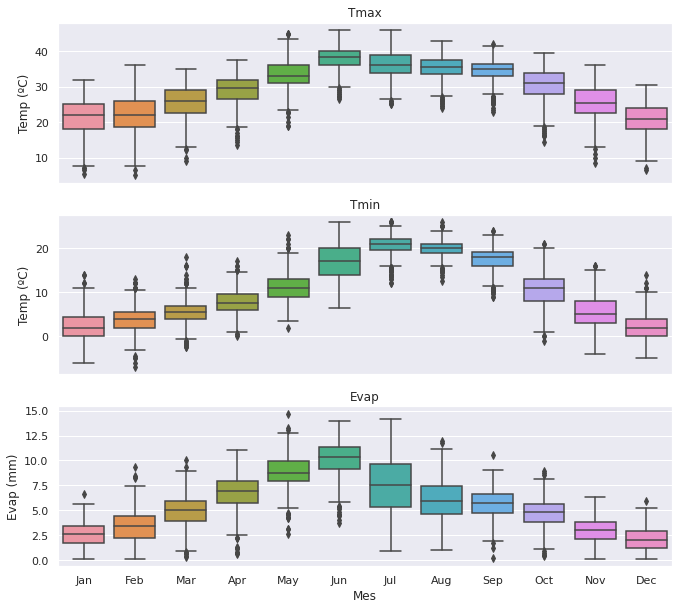

In [19]:
# Analizando Estacionalidad de los datos, similar a lo que ya hicimos anteriormente.
# Dos gráficas en una
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_90, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

**Suavizando la curva mediante Promedios Móviles**.

Hay muchos tipos de promedios móviles. El más directo es sacar un promedio en un punto, considerando los valores de los puntos vecinos (puede ser centrado o histórico), y podemos también dar un peso (grado de influencia) de los puntos vecinos (Ej. Promedio móvil Exponencial y otros).

In [21]:
# Suavizando la curva de Tmax, utilizando Promedios Móviles (7,30 y 365 días)
data_cols = ['Evap', 'Tmax', 'Tmin']
df_90_7d = df_90[data_cols].rolling(7, center=True).mean()
df_90_30d = df_90[data_cols].rolling(30, center=True).mean()
df_90_365d = df_90[data_cols].rolling(365, center=True).mean()


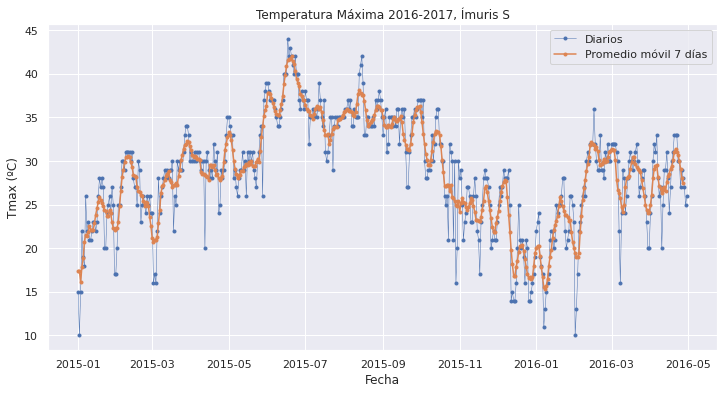

In [22]:
# Fechas de inicio y fin, para filtrar la información
start, end = '2015-01', '2016-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2015-2016, Ímuris S')
ax.legend();

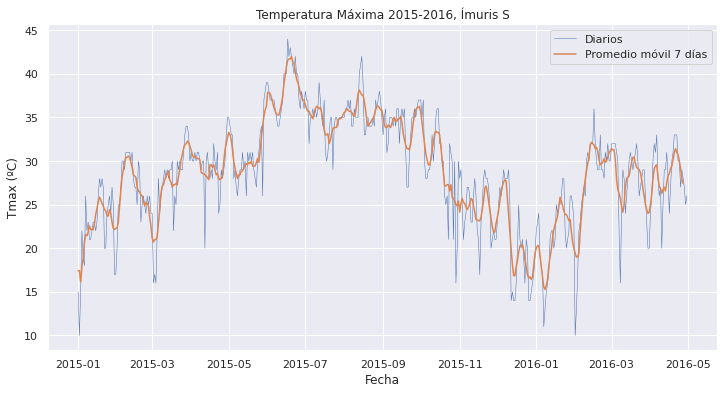

In [23]:
# Misma gráfica anterior pero sin marcadores '.'
# Fechas de inicio y fin, para filtrar la información
start, end = '2015-01', '2016-12'

# Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
linestyle='-', linewidth=0.5, label='Diarios')
ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2015-2016, Ímuris S')
ax.legend();

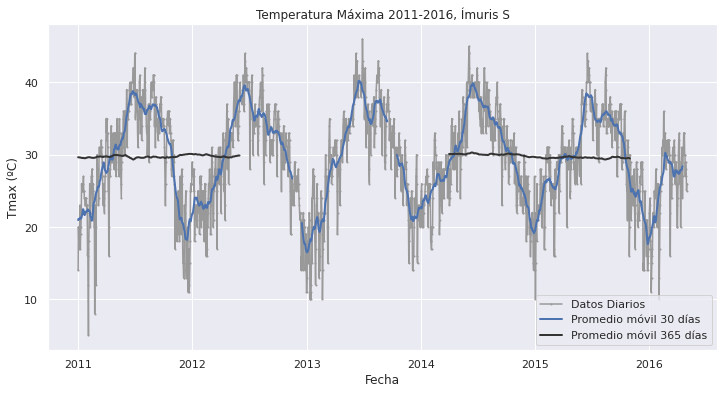

In [24]:
# Tendencias ... año con año

# Fechas de inicio y fin, para filtrar la información
start, end = '2011-01', '2016-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmax'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmax'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmax'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmax'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmax (ºC)')
ax.set_title('Temperatura Máxima 2011-2016, Ímuris S')
ax.legend();

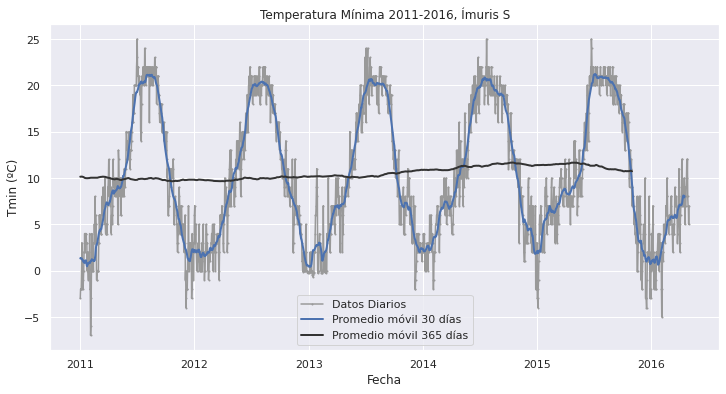

In [25]:
# Tendencias ... año con año para Tmin

# Fechas de inicio y fin, para filtrar la información
start, end = '2011-01', '2016-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 30 y 365 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Tmin'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
#ax.plot(df_90_7d.loc[start:end, 'Tmin'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Tmin'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')
ax.plot(df_90_365d.loc[start:end, 'Tmin'], linestyle='-', color='0.2', linewidth=2, label='Promedio móvil 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Tmin (ºC)')
ax.set_title('Temperatura Mínima 2011-2016, Ímuris S')
ax.legend();


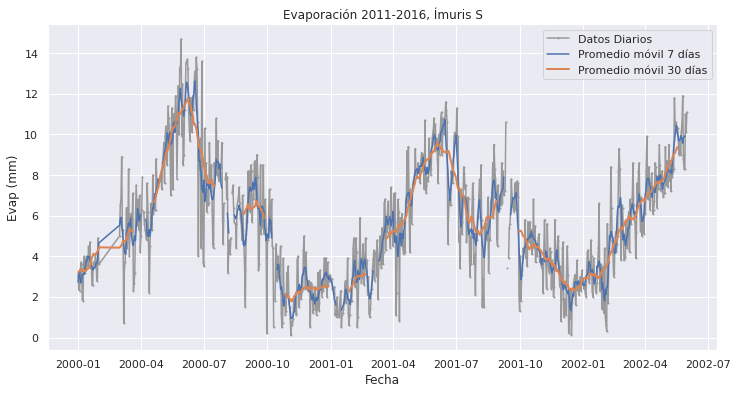

In [30]:
# Tendencias ... año con año

# Fechas de inicio y fin, para filtrar la información
start, end = '2000-01', '2016-12'

# Contraste de la gráfica de datos diarios y promedio móvil de 7 y 30 días 
sns.set(rc={'figure.figsize':(12, 6)})

fig, ax = plt.subplots()
ax.plot(df_90.loc[start:end, 'Evap'],
marker='.', markersize=2, linestyle='-', color='0.6',label='Datos Diarios')
ax.plot(df_90_7d.loc[start:end, 'Evap'], linestyle='-', label='Promedio móvil 7 días')
ax.plot(df_90_30d.loc[start:end, 'Evap'], linestyle='-', linewidth=2, label='Promedio móvil 30 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evap (mm)')
ax.set_title('Evaporación 2011-2016, Ímuris S')
ax.legend();

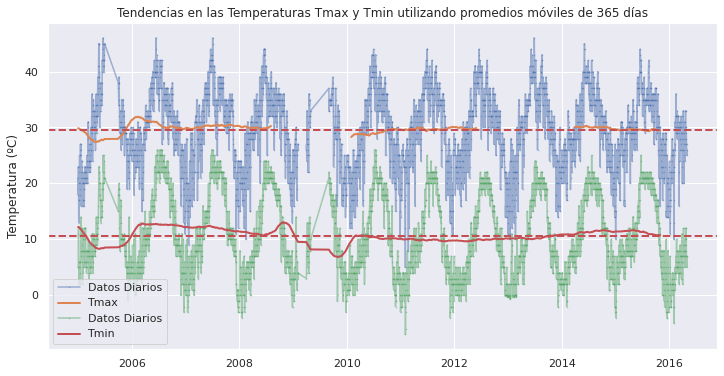

In [26]:
# Graficas de promedios móviles de 365 días para las variables de las Temperaturas  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2005-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Tendencias en las Temperaturas Tmax y Tmin utilizando promedios móviles de 365 días');

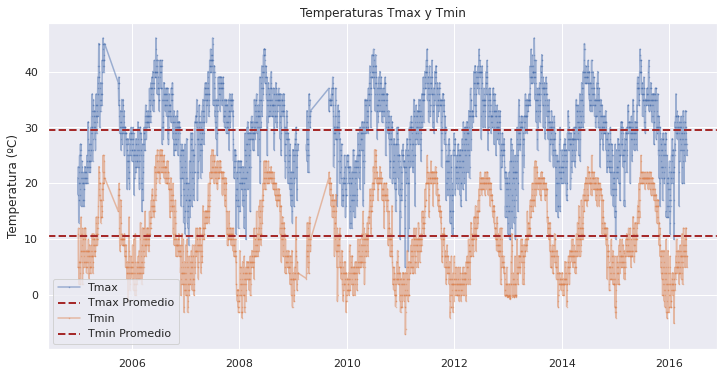

In [27]:
#Graficas de Temperaturas Tmax, Tmin y Promedios  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '2005-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Tmax', 'Tmin']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', 
            alpha=0.5, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color='brown', linestyle='--', 
                linewidth=2, label=nm + ' Promedio');
    
    ax.legend()
    ax.set_ylabel('Temperatura (ºC)')
    ax.set_title('Temperaturas Tmax y Tmin');

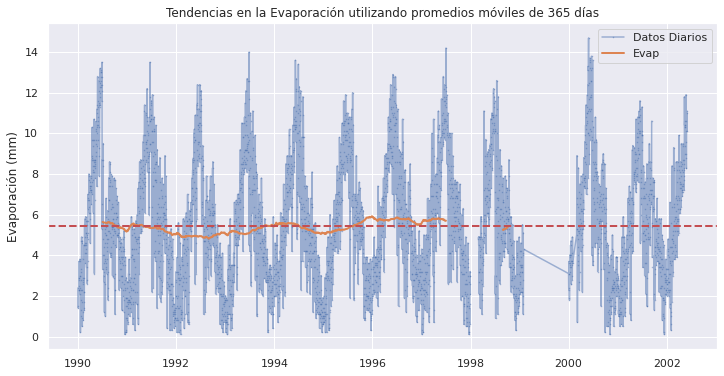

In [32]:
# Graficas de promedios móviles de 365 días para las variables de la Evaporación  
sns.set(rc={'figure.figsize':(12, 6)})

start, end = '1990-01', '2017-12'

fig, ax = plt.subplots()
for nm in ['Evap']:
    ax.plot(df_90.loc[start:end, nm], marker='.', markersize=1, linestyle='-', alpha=0.5, label='Datos Diarios')
    ax.plot(df_90_365d.loc[start:end, nm], linewidth=2, label=nm)
    plt.axhline(df_90.loc[start:end, nm].mean(), color = 'r', linestyle='--', linewidth=2);
    
    ax.legend()
    ax.set_ylabel('Evaporación (mm)')
    ax.set_title('Tendencias en la Evaporación utilizando promedios móviles de 365 días');

In [28]:
df_90_365d.info()
print(df_90_365d.head(185))
print(df_90_365d.tail(185))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8983 entries, 1990-01-01 to 2016-04-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Evap    2596 non-null   float64
 1   Tmax    7190 non-null   float64
 2   Tmin    8224 non-null   float64
dtypes: float64(3)
memory usage: 600.7 KB
                Evap       Tmax      Tmin
Fecha                                    
1990-01-01       NaN        NaN       NaN
1990-01-02       NaN        NaN       NaN
1990-01-03       NaN        NaN       NaN
1990-01-04       NaN        NaN       NaN
1990-01-05       NaN        NaN       NaN
...              ...        ...       ...
1990-06-30       NaN        NaN       NaN
1990-07-01       NaN        NaN       NaN
1990-07-02  5.639178  27.764384  9.673973
1990-07-03  5.640000  27.773973  9.686301
1990-07-04  5.640274  27.794521  9.698630

[185 rows x 3 columns]
            Evap       Tmax       Tmin
Fecha                                 
2


**Análisis de Tendencia de Tmax** usando *statsmodel*

Temp observada = Tendencia + Estacionalidad + Residuo

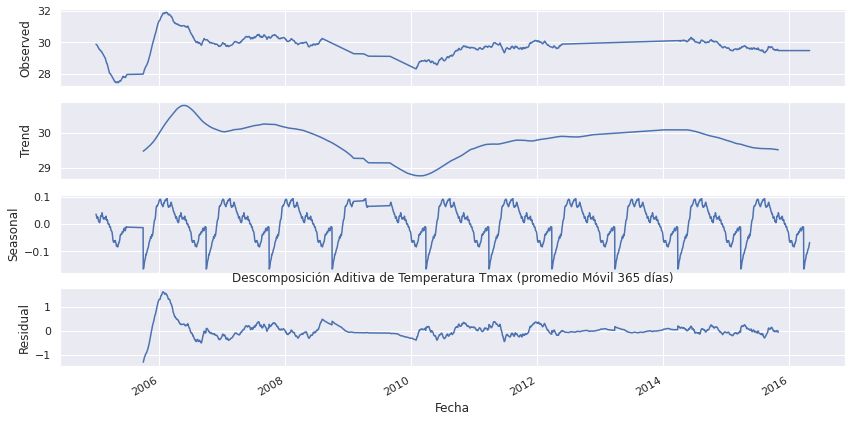

In [33]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2005-01', '2017-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)');

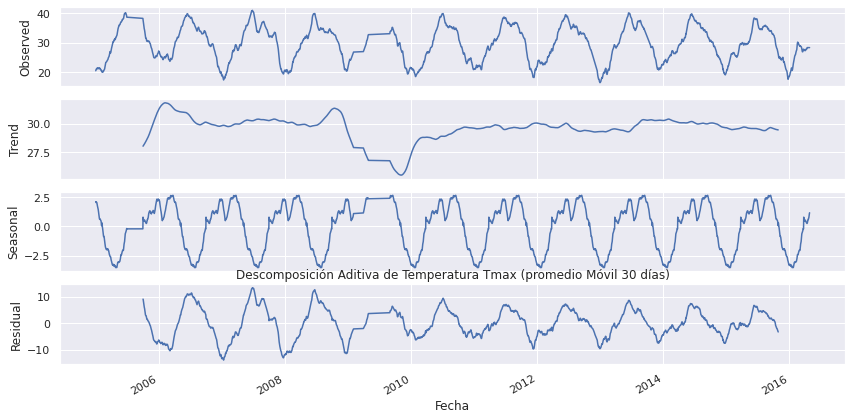

In [34]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2005-01', '2017-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 30 días)');

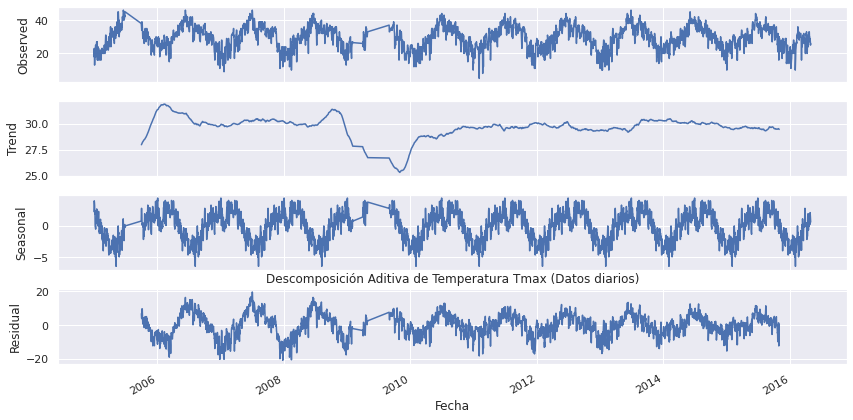

In [35]:
# Caso: Uso de datos diarios 
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2005-01', '2017-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 


resTmax = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmax'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Tmax (Datos diarios)');

**Análisis de Tendencia de Tmin**

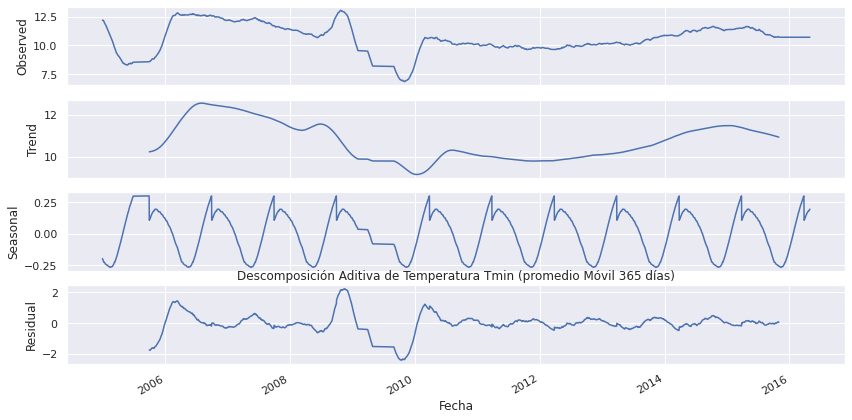

In [36]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2005-01', '2017-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 365 días)');

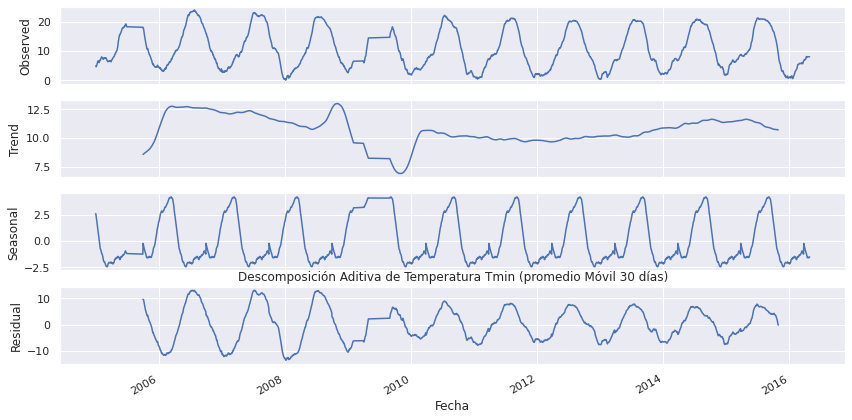

In [37]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2005-01', '2017-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (promedio Móvil 30 días)');

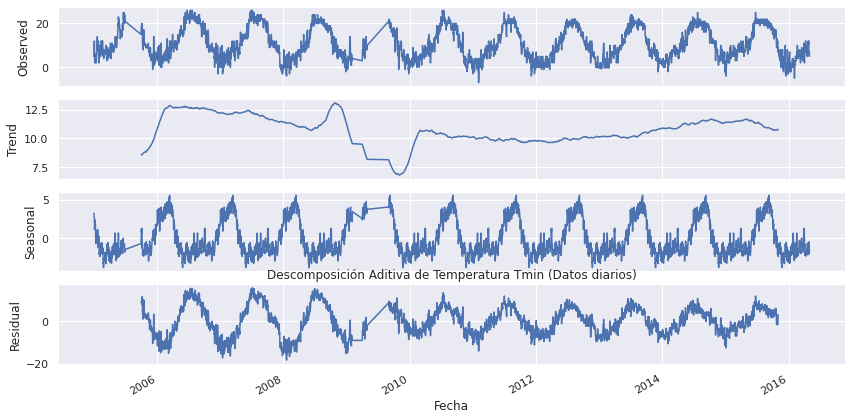

In [38]:
# Caso: Uso de datos diarios.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '2005-01', '2017-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resTmin = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Tmin'].interpolate(),
                                    freq=decompfreq, model='additive')
resTmin.plot()

plt.title('Descomposición Aditiva de Temperatura Tmin (Datos diarios)');

**Análisis de Tendencia de Evap**

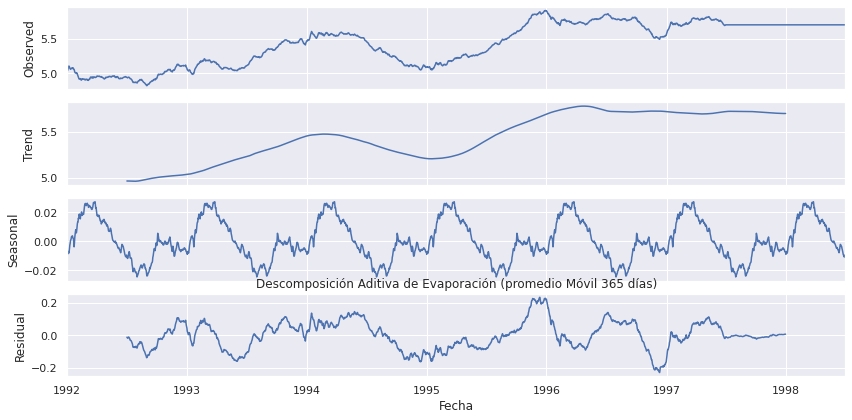

In [52]:
# Caso: Uso de datos con promedio móvil de 365 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1992-01', '1998-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resEvap = sm.tsa.seasonal_decompose(df_90_365d.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 365 días)');

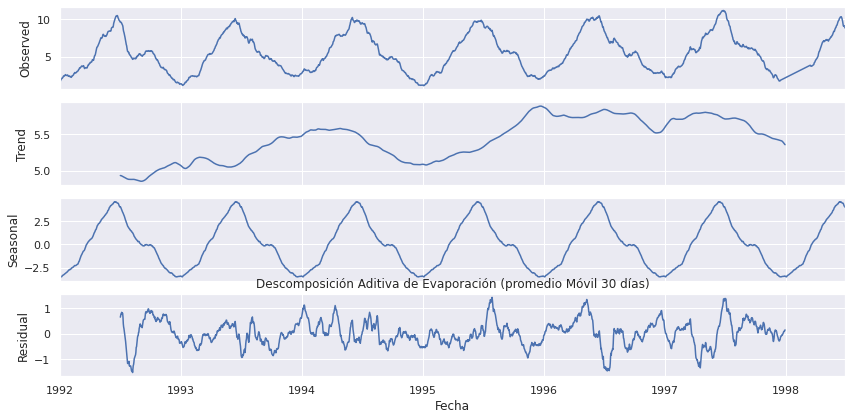

In [53]:
# Caso: Uso de datos con promedio móvil de 30 días.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1992-01', '1998-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resEvap = sm.tsa.seasonal_decompose(df_90_30d.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil 30 días)');

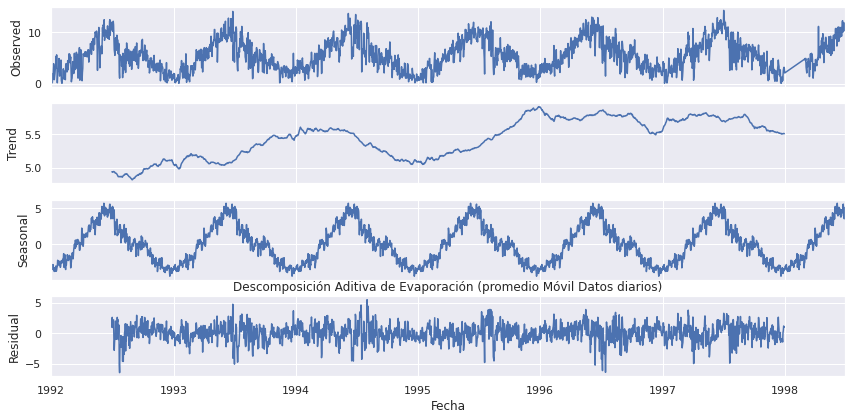

In [55]:
# Caso: Uso de datos con promedio móvil de Datos diarios.
# Descomposición de Series de Tiempo 
# Uso de la biblioteca 'statsmodel' (agregada en la celda 1)
# import statsmodels.api as sm 

# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo

# Tamaño de la figura
sns.set(rc={'figure.figsize':(12, 6)})
# Periodo de datos completos (No funciona cuando hace falta un rango de datos)
start, end = '1992-01', '1998-06'

# Ciclo anual 365 días (Por las Estaciones)
decompfreq = 365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 

resEvap = sm.tsa.seasonal_decompose(df_90.loc[start:end, 'Evap'].interpolate(),
                                    freq=decompfreq, model='additive')
resEvap.plot()

plt.title('Descomposición Aditiva de Evaporación (promedio Móvil Datos diarios)');

In [56]:
resTmax.trend.describe()

count    3503.000000
mean       29.721527
std         0.990004
min        25.316438
25%        29.522603
50%        29.810959
75%        30.172603
max        31.917808
Name: Tmax, dtype: float64

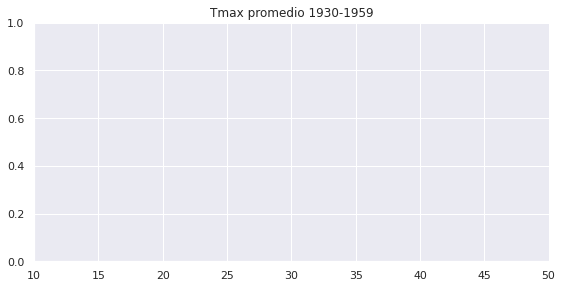

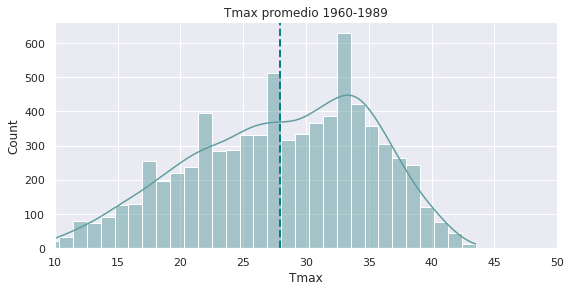

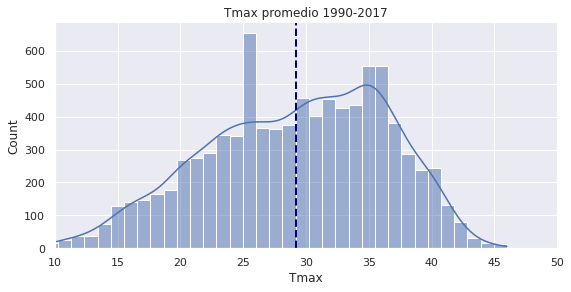

Tmax_promedio df_30 =  nan ºC
Tmax_promedio df_60 =  27.93564395955295 ºC
Tmax_promedio df_90 =  29.187842217007486 ºC


In [57]:

# Gráfica de distribuciones de Temperaturas Tmax 

g1 = sns.displot(df_30.Tmax, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.Tmax.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60.Tmax, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmax.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmax, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmax.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmax promedio 1930-1959');
g2.set(title='Tmax promedio 1960-1989');
g3.set(title='Tmax promedio 1990-2017');
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))


plt.show();

print('Tmax_promedio df_30 = ', df_30.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_60 = ', df_60.Tmax.mean(), 'ºC' )
print('Tmax_promedio df_90 = ', df_90.Tmax.mean(), 'ºC' )

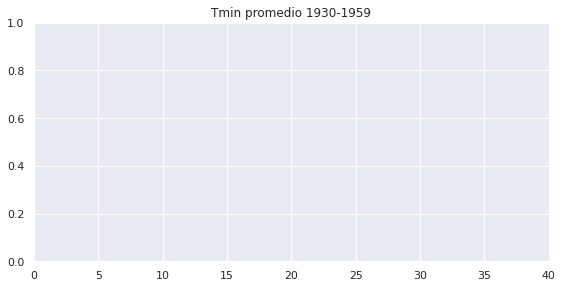

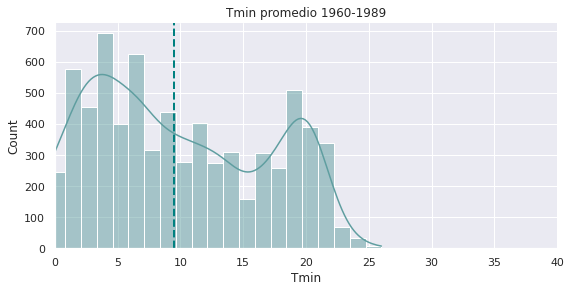

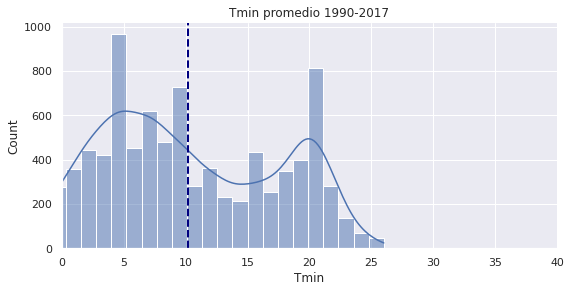

Tmin_promedio df_30 =  nan ºC
Tmin_promedio df_60 =  9.522248835662008 ºC
Tmin_promedio df_90 =  10.171537086684536 ºC
Tmin_sdev df_30 =  nan ºC
Tmin_sdev df_60 =  7.102379946487555 ºC
Tmin_sdev df_90 =  7.208227833727653 ºC


In [58]:
# Gráfica de distribuciones de Temperaturas Tmin 

g1 = sns.displot(df_30.Tmin, kde=True, color='lightblue', height=4, aspect=2);
plt.axvline(df_30.Tmin.mean(), linestyle='--', linewidth=2, color='steelblue');

g2 = sns.displot(df_60.Tmin, kde=True, color='cadetblue', height=4, aspect=2);
plt.axvline(df_60.Tmin.mean(), linestyle='--', linewidth=2, color='teal');

g3 = sns.displot(df_90.Tmin, kde=True, height=4, aspect=2);
plt.axvline(df_90.Tmin.mean(), linestyle='--', linewidth=2, color='navy');

g1.set(title='Tmin promedio 1930-1959');
g2.set(title='Tmin promedio 1960-1989');
g3.set(title='Tmin promedio 1990-2017');
g1.set(xlim=(0,40))
g2.set(xlim=(0,40))
g3.set(xlim=(0,40))


plt.show();

print('Tmin_promedio df_30 = ', df_30.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_60 = ', df_60.Tmin.mean(), 'ºC' )
print('Tmin_promedio df_90 = ', df_90.Tmin.mean(), 'ºC' )

print('Tmin_sdev df_30 = ', df_30.Tmin.std(), 'ºC' )
print('Tmin_sdev df_60 = ', df_60.Tmin.std(), 'ºC' )
print('Tmin_sdev df_90 = ', df_90.Tmin.std(), 'ºC' )